In [1]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import math

##### Efficiency  

In [5]:
# CPU 
GFLOPS = 3.1 * 4 * 32
TDP = 45
e_CPU = GFLOPS/TDP

# GPU
GFLOPS = 1858
TDP = 75
e_GPU = GFLOPS/TDP
print(f'Efficiency in 10^9 for CPU and GPU respectively is {e_CPU} {e_GPU}')

Efficiency in 10^9 for CPU and GPU respectively is 8.817777777777778 24.773333333333333


### Fine-Tuning

In [6]:
NONE = 0
DISTILBERT = 1
BERT = 2
ALBERT = 3
ROBERTA = 4
BERTLARGE = 5

data = { 
        'GFLOP': [0, 48.5,97.1,97.2,97.0,336.3], 
        'cpu_dram': [0, 12.416072284453714,25.505229453878552,19.377307200891423,23.64676951910206, 368.16889182816897],
        'gpu': [0,129.04713689969194,281.31908675627307,258.6472488171123,249.4341290574638, 793.1026422480742],
        'cold-start': [0, 237.9, 160.2,188.8, 258.8, 371.3],  
        'inference': [0, 8774.91/511,19952.61/511,17649.13/511,17262.12/511,45886.24/511]}

energy_df = pd.DataFrame(data)
energy_df

,GFLOP,cpu_dram,gpu,cold-start,inference
0,0.0,0.000000,0.000000,0.0,0.000000
1,48.5,12.416072,129.047137,237.9,17.172035
2,97.1,25.505229,281.319087,160.2,39.046204
3,97.2,19.377307,258.647249,188.8,34.538415
4,97.0,23.646770,249.434129,258.8,33.781057
5,336.3,368.168892,793.102642,371.3,89.796947


old data prints without bert large

plt.figtext(0.15, 0.2, f'Null')
plt.figtext(x[DISTILBERT]/92, y[DISTILBERT]/27, f'DistilBERT')
plt.figtext(x[BERT]/124, y[BERT]/30.5, f'BERT')
plt.figtext(x[ALBERT]/125, y[ALBERT]/30, f'Albert')
plt.figtext(x[ROBERTA]/130, y[ROBERTA]/30, f'RoBERTa')

R-squared: 0.961048


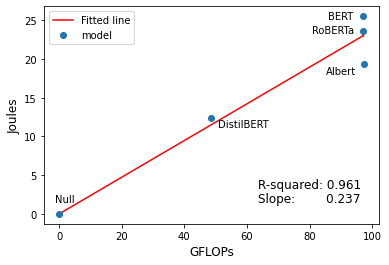

Slope = 0.23683224902216155
For gpu we have the linear function f(GFLOPS, e_gpu) = (GFLOPS*2.088334142488749)/e_GPU


In [4]:
# Linear regression

xs = energy_df['GFLOP'][:-1]
ys = energy_df['cpu_dram'][:-1]

# Then we prepare the coefficient matrixs according docs
# https://docs.scipys.org/doc/numpys/reference/generated/numpys.linalg.lstsq.html
A = np.vstack([xs, np.ones(len(xs))]).T

# Then we prepare weights for these points. And we put all weights
# equal exscept the last one (for added anchor point).
# In this exsample it's weight 1000 times larger in comparison with others.
W = np.diag(np.ones([len(xs)]))
W[0,0] = 1000.

# And we find least-squares solution.
m, c = np.linalg.lstsq(np.dot(W, A), np.dot(W, ys), rcond=None)[0]
_, resid = np.linalg.lstsq(np.dot(W, A), np.dot(W, ys), rcond=None)[:2]
r2 = 1 - resid / (ys.size * ys.var())
plt.plot(xs, m * xs + c, 'r', label='Fitted line')

print(f"R-squared: {r2[0]:.6f}")
plt.plot(xs, ys, 'o', label='model')
# plt.plot(xs, res.intercept + res.slope*xs, 'r', label='fitted line')
plt.figtext(.62, .2, f'Slope:        {m:.3f}', fontfamily='sans-serif', fontsize="large")
plt.figtext(.62, .25, f'R-squared: {r2[0]:.3f}', fontfamily='sans-serif', fontsize="large")
plt.figtext(0.15, 0.2, f'Null')
plt.figtext(xs[DISTILBERT]/92, ys[DISTILBERT]/27, f'DistilBERT')
plt.figtext(xs[BERT]/124, ys[BERT]/30.5, f'BERT')
plt.figtext(xs[ALBERT]/125, ys[ALBERT]/30, f'Albert')
plt.figtext(xs[ROBERTA]/130, ys[ROBERTA]/30, f'RoBERTa')
plt.xlabel("GFLOPs", fontsize=12)
plt.ylabel("Joules", fontsize=12)
plt.legend()
plt.savefig("cpu_energy.svg")
plt.show()

adj_slope = m*e_CPU
print("Slope =", m )
print(f'For gpu we have the linear function f(GFLOPS, e_gpu) = (GFLOPS*{adj_slope})/e_GPU')

R-squared: 0.301757


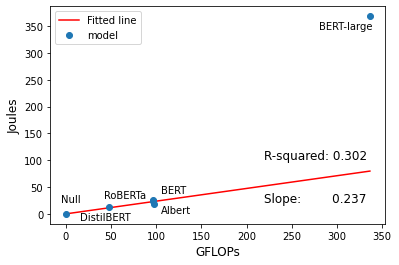

For gpu we have the linear function f(GFLOPS, e_gpu) = (GFLOPS*2.0916093859710196+-0.006251473599958178)/e_GPU


In [118]:
# Linear regression Validation

xs = energy_df['GFLOP']
ys = energy_df['cpu_dram']

# Then we prepare the coefficient matrixs according docs
# https://docs.scipys.org/doc/numpys/reference/generated/numpys.linalg.lstsq.html
A = np.vstack([xs, np.ones(len(xs))]).T

# Then we prepare weights for these points. And we put all weights
# equal exscept the last one (for added anchor point).
# In this exsample it's weight 1000 times larger in comparison with others.
W = np.diag(np.ones([len(xs)]))
W[NONE,NONE] = 1000
W[ALBERT,ALBERT] = 16.5

# And we find least-squares solution.
m, c = np.linalg.lstsq(np.dot(W, A), np.dot(W, ys), rcond=None)[0]
_, resid = np.linalg.lstsq(np.dot(W, A), np.dot(W, ys), rcond=None)[:2]
r2 = 1 - resid / (ys.size * ys.var())
# m = 0.23683224902216155
plt.plot(xs, m * xs + c, 'r', label='Fitted line')

print(f"R-squared: {r2[0]:.6f}")

plt.plot(xs, ys, 'o', label='model')
# plt.plot(xs, res.intercept + res.slope*xs, 'r', label='fitted line')
plt.figtext(.62, .2, f'Slope:        {m:.3f}', fontfamily='sans-serif', fontsize="large")
plt.figtext(.62, .35, f'R-squared: {r2[0]:.3f}', fontfamily='sans-serif', fontsize="large")
plt.figtext(0.15, 0.2, f'Null')
plt.figtext(xs[DISTILBERT]/250, ys[DISTILBERT]/90, f'DistilBERT')
plt.figtext(xs[BERT]/255, ys[BERT]/110, f'BERT')
plt.figtext(xs[ALBERT]/255, ys[ALBERT]/120, f'Albert')
plt.figtext(xs[ROBERTA]/390, ys[ROBERTA]/110, f'RoBERTa')
plt.figtext(xs[BERTLARGE]/450, ys[BERTLARGE]/460, f'BERT-large')
plt.xlabel("GFLOPs", fontsize=12)
plt.ylabel("Joules", fontsize=12)
plt.legend()
plt.savefig("cpu_energy_validation.svg")
plt.show()

adj_slope = m*e_CPU
adj_intercept = c*e_CPU

print(f'For gpu we have the linear function f(GFLOPS, e_gpu) = (GFLOPS*{adj_slope}+{adj_intercept})/e_GPU')

R-squared: 0.994898
LinregressResult(slope=2.3207661227897103, intercept=23.74671136008203, rvalue=0.9974454941022943, pvalue=9.77991585751471e-06, stderr=0.08310040325818085, intercept_stderr=12.862016422971287)


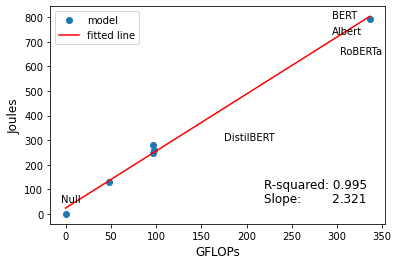

For gpu we have the linear function f(GFLOPS, e_gpu) = (GFLOPS*57.49311274857709588.2851960937655)/e_GPU


In [104]:
# Linear regression

x = energy_df['GFLOP']
y = energy_df['gpu']

res = stats.linregress(x, y)
print(f"R-squared: {res.rvalue**2:.6f}")
print(res)

plt.plot(x, y, 'o', label='model')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.figtext(.62, .2, f'Slope:        {res.slope:.3f}', fontfamily='sans-serif', fontsize="large")
plt.figtext(.62, .25, f'R-squared: {res.rvalue**2:.3f}', fontfamily='sans-serif', fontsize="large")
plt.figtext(0.15, 0.2, f'Null')
plt.figtext(x[DISTILBERT]/92, y[DISTILBERT]/310, f'DistilBERT')
plt.figtext(x[BERT]/125, y[BERT]/335, f'BERT')
plt.figtext(x[ALBERT]/125, y[ALBERT]/330, f'Albert')
plt.figtext(x[ROBERTA]/122, y[ROBERTA]/350, f'RoBERTa')
plt.xlabel("GFLOPs", fontsize=12)
plt.ylabel("Joules", fontsize=12)
plt.legend()
plt.savefig("gpu_energy.svg")
plt.show()

adj_slope = res.slope*e_GPU
adj_intercept = res.intercept*e_GPU

print(f'For gpu we have the linear function f(GFLOPS, e_gpu) = (GFLOPS*{adj_slope}{adj_intercept})/e_GPU')

R-squared: 0.948931


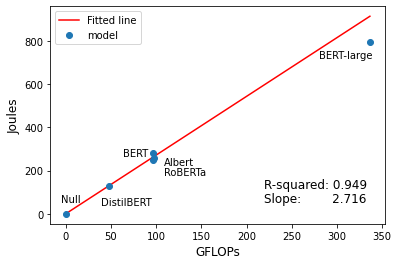

For gpu we have the linear function f(GFLOPS, e_gpu) = (GFLOPS*23.950974066371290.002602530097134828)/e_GPU


In [102]:
# Linear regression validation

xs = energy_df['GFLOP']
ys = energy_df['gpu']

# Then we prepare the coefficient matrixs according docs
# https://docs.scipys.org/doc/numpys/reference/generated/numpys.linalg.lstsq.html
A = np.vstack([xs, np.ones(len(xs))]).T

# Then we prepare weights for these points. And we put all weights
# equal exscept the last one (for added anchor point).
# In this exsample it's weight 1000 times larger in comparison with others.
W = np.diag(np.ones([len(xs)]))
W[0,0] = 1000
W[BERT,BERT] = 4.99

# And we find least-squares solution.
m, c = np.linalg.lstsq(np.dot(W, A), np.dot(W, ys), rcond=None)[0]
_, resid = np.linalg.lstsq(np.dot(W, A), np.dot(W, ys), rcond=None)[:2]
r2 = 1 - resid / (ys.size * ys.var())
# m = 2.7161868989815496
plt.plot(xs, m * xs + c, 'r', label='Fitted line')

print(f"R-squared: {r2[0]:.6f}")

plt.plot(xs, ys, 'o', label='model')
# plt.plot(xs, res.intercept + res.slope*xs, 'r', label='fitted line')
plt.figtext(.62, .2, f'Slope:        {m:.3f}', fontfamily='sans-serif', fontsize="large")
plt.figtext(.62, .25, f'R-squared: {r2[0]:.3f}', fontfamily='sans-serif', fontsize="large")
plt.figtext(0.15, 0.2, f'Null')
plt.figtext(xs[DISTILBERT]/200, ys[DISTILBERT]/680, f'DistilBERT')
plt.figtext(xs[BERT]/330, ys[BERT]/785, f'BERT')
plt.figtext(xs[ALBERT]/250, ys[ALBERT]/790, f'Albert')
plt.figtext(xs[ROBERTA]/250, ys[ROBERTA]/850, f'RoBERTa')
plt.figtext(xs[BERTLARGE]/450, ys[BERTLARGE]/1130, f'BERT-large')
plt.xlabel("GFLOPs", fontsize=12)
plt.ylabel("Joules", fontsize=12)
plt.legend()
plt.savefig("gpu_energy_validation.svg")
plt.show()

adj_slope = m*e_CPU
adj_intercept = c*e_CPU

print(f'For gpu we have the linear function f(GFLOPS, e_gpu) = (GFLOPS*{adj_slope}{adj_intercept})/e_GPU')

R-squared: 0.373442


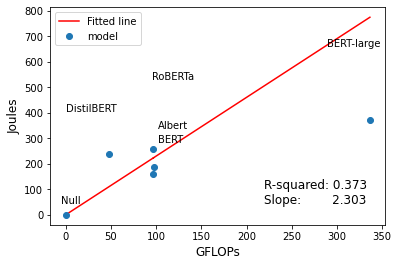

2.30268489623915

In [53]:
# Linear regression Inference

xs = energy_df['GFLOP']
ys = energy_df['cold-start']

# Then we prepare the coefficient matrixs according docs
# https://docs.scipys.org/doc/numpys/reference/generated/numpys.linalg.lstsq.html
A = np.vstack([xs, np.ones(len(xs))]).T

# Then we prepare weights for these points. And we put all weights
# equal exscept the last one (for added anchor point).
# In this exsample it's weight 1000 times larger in comparison with others.
W = np.diag(np.ones([len(xs)]))
W[0,0] = 1000.

# And we find least-squares solution.
m, c = np.linalg.lstsq(np.dot(W, A), np.dot(W, ys), rcond=None)[0]
_, resid = np.linalg.lstsq(np.dot(W, A), np.dot(W, ys), rcond=None)[:2]
r2 = 1 - resid / (ys.size * ys.var())
m = 2.30268489623915
plt.plot(xs, m * xs + c, 'r', label='Fitted line')

print(f"R-squared: {r2[0]:.6f}")

plt.plot(xs, ys, 'o', label='model')
# plt.plot(xs, res.intercept + res.slope*xs, 'r', label='fitted line')
plt.figtext(.62, .2, f'Slope:        {m:.3f}', fontfamily='sans-serif', fontsize="large")
plt.figtext(.62, .25, f'R-squared: {r2[0]:.3f}', fontfamily='sans-serif', fontsize="large")
plt.figtext(0.15, 0.2, f'Null')
plt.figtext(xs[DISTILBERT]/300, ys[DISTILBERT]/460, f'DistilBERT')
plt.figtext(xs[BERT]/260, ys[BERT]/390, f'BERT')
plt.figtext(xs[ALBERT]/260, ys[ALBERT]/410, f'Albert')
plt.figtext(xs[ROBERTA]/270, ys[ROBERTA]/410, f'RoBERTa')
plt.figtext(xs[BERTLARGE]/440, ys[BERTLARGE]/500, f'BERT-large')
plt.xlabel("GFLOPs", fontsize=12)
plt.ylabel("Joules", fontsize=12)
plt.legend()
plt.savefig("cold_energy.svg")
plt.show()
m

R-squared: 0.98736459
Slope: 0.36746231


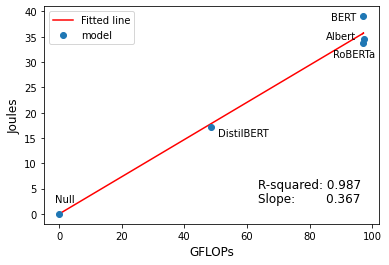

In [54]:
# Linear regression Inference

xs = energy_df['GFLOP'][:-1]
ys = energy_df['inference'][:-1]

# Then we prepare the coefficient matrixs according docs
# https://docs.scipys.org/doc/numpys/reference/generated/numpys.linalg.lstsq.html
A = np.vstack([xs, np.ones(len(xs))]).T

# Then we prepare weights for these points. And we put all weights
# equal exscept the last one (for added anchor point).
# In this exsample it's weight 1000 times larger in comparison with others.
W = np.diag(np.ones([len(xs)]))
W[0,0] = 1000.

# And we find least-squares solution.
m, c = np.linalg.lstsq(np.dot(W, A), np.dot(W, ys), rcond=None)[0]
_, resid = np.linalg.lstsq(np.dot(W, A), np.dot(W, ys), rcond=None)[:2]
r2 = 1 - resid / (ys.size * ys.var())
plt.plot(xs, m * xs + c, 'r', label='Fitted line')

print(f"R-squared: {r2[0]:.8f}")
print(f"Slope: {m:.8f}")

plt.plot(xs, ys, 'o', label='model')
# plt.plot(xs, res.intercept + res.slope*xs, 'r', label='fitted line')
plt.figtext(.62, .2, f'Slope:        {m:.3f}', fontfamily='sans-serif', fontsize="large")
plt.figtext(.62, .25, f'R-squared: {r2[0]:.3f}', fontfamily='sans-serif', fontsize="large")
plt.figtext(0.15, 0.2, f'Null')
plt.figtext(xs[DISTILBERT]/92, ys[DISTILBERT]/40, f'DistilBERT')
plt.figtext(xs[BERT]/123, ys[BERT]/47, f'BERT')
plt.figtext(xs[ALBERT]/125, ys[ALBERT]/45, f'Albert')
plt.figtext(xs[ROBERTA]/122, ys[ROBERTA]/48, f'RoBERTa')
plt.xlabel("GFLOPs", fontsize=12)
plt.ylabel("Joules", fontsize=12)
plt.legend()
plt.savefig("inference_energy.svg")
plt.show()

R-squared: 0.71850522
Slope: 0.36678858


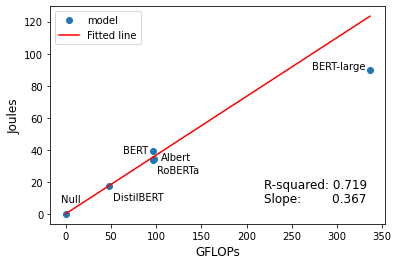

In [66]:
# Linear regression Inference Validation

xs = energy_df['GFLOP']
ys = energy_df['inference']

# Then we prepare the coefficient matrixs according docs
# https://docs.scipys.org/doc/numpys/reference/generated/numpys.linalg.lstsq.html
A = np.vstack([xs, np.ones(len(xs))]).T

# Then we prepare weights for these points. And we put all weights
# equal exscept the last one (for added anchor point).
# In this exsample it's weight 1000 times larger in comparison with others.
W = np.diag(np.ones([len(xs)]))
W[0,0] = 1000
W[BERT,BERT] = 5.9

# And we find least-squares solution.
[m, c], [resid] = np.linalg.lstsq(np.dot(W, A), np.dot(W, ys), rcond=None)[:2]
r2 = 1 - resid / (ys.size * ys.var())


print(f"R-squared: {r2:.8f}")
print(f"Slope: {m:.8f}")

plt.plot(xs, ys, 'o', label='model')
plt.plot(xs, m * xs + c, 'r', label='Fitted line')
plt.figtext(.62, .2, f'Slope:        {m:.3f}', fontfamily='sans-serif', fontsize="large")
plt.figtext(.62, .25, f'R-squared: {r2:.3f}', fontfamily='sans-serif', fontsize="large")
plt.figtext(0.15, 0.2, f'Null')
plt.figtext(xs[DISTILBERT]/180, ys[DISTILBERT]/83, f'DistilBERT')
plt.figtext(xs[BERT]/330, ys[BERT]/105, f'BERT')
plt.figtext(xs[ALBERT]/255, ys[ALBERT]/100, f'Albert')
plt.figtext(xs[ROBERTA]/260, ys[ROBERTA]/112, f'RoBERTa')
plt.figtext(xs[BERTLARGE]/460, ys[BERTLARGE]/136, f'BERT-large')
plt.xlabel("GFLOPs", fontsize=12)
plt.ylabel("Joules", fontsize=12)
plt.legend()
plt.savefig("inference_energy_validation.svg")
plt.show()

#### Equations

In [61]:
# Linear regression Inference Validation

xs = energy_df['GFLOP']
ys = energy_df['inference']

# Then we prepare the coefficient matrixs according docs
# https://docs.scipys.org/doc/numpys/reference/generated/numpys.linalg.lstsq.html
A = np.vstack([xs, np.ones(len(xs))]).T

# Then we prepare weights for these points. And we put all weights
# equal exscept the last one (for added anchor point).
# In this exsample it's weight 1000 times larger in comparison with others.
W = np.diag(np.ones([len(xs)]))
W[0,0] = 1000
W[BERT,BERT] = 5.9

# And we find least-squares solution.
obj1 = np.linalg.lstsq(np.dot(W, A), np.dot(W, ys), rcond=None)[0]
[m,c], [r] = np.linalg.lstsq(np.dot(W, A), np.dot(W, ys), rcond=None)[:2]

print(m,c,r)

0.3667885774820143 8.234891819987798e-05 1540.501845805482
